In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import urllib.request
import isoweek

In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
data_file = "syndrome_vericelle.csv"
if os.path.exists(data_file):
    pass
else:
    urllib.request.urlretrieve(data_url, data_file)

In [3]:
data = pd.read_csv(data_file, skiprows=1)

In [4]:
data.head()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  inc100_up  \
0  202204          7   9487     6658   12316      14          10         18   
1  202203          7  13972    10680   17264      21          16         26   
2  202202          7   8495     6026   10964      13           9         17   
3  202201          7  13793    10597   16989      21          16         26   
4  202152          7  13239     9611   16867      20          15         25   

  geo_insee geo_name  
0        FR   France  
1        FR   France  
2        FR   France  
3        FR   France  
4        FR   France

In [5]:
data.tail()

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
1621  199101          7  15565    10271   20859      27          18   
1622  199052          7  19375    13295   25455      34          23   
1623  199051          7  19080    13807   24353      34          25   
1624  199050          7  11079     6660   15498      20          12   
1625  199049          7   1143        0    2610       2           0   

      inc100_up geo_insee geo_name  
1621         36        FR   France  
1622         45        FR   France  
1623         43        FR   France  
1624         28        FR   France  
1625          5        FR   France

In [6]:
print(data.dtypes)
data.describe()

week           int64
indicator      int64
inc            int64
inc_low        int64
inc_up         int64
inc100         int64
inc100_low     int64
inc100_up      int64
geo_insee     object
geo_name      object
dtype: object


week  indicator           inc       inc_low        inc_up  \
count    1626.000000     1626.0   1626.000000   1626.000000   1626.000000   
mean   200626.720787        7.0  12433.839483   7840.616236  17064.530750   
std       899.691590        0.0   6628.865434   5146.637997   8398.872725   
min    199049.000000        7.0    161.000000      0.000000    597.000000   
25%    199838.250000        7.0   7162.250000   3514.750000  10573.250000   
50%    200626.500000        7.0  12366.000000   7760.000000  17028.000000   
75%    201415.750000        7.0  16966.750000  11521.750000  22474.250000   
max    202204.000000        7.0  36298.000000  25490.000000  54240.000000   

            inc100   inc100_low    inc100_up  
count  1626.000000  1626.000000  1626.000000  
mean     20.406519    12.865314    28.009840  
std      10.997742     8.526863    13.953634  
min       0.000000     0.000000     1.000000  
25%      12.000000     6.000000    17.000000  
50%      20.000000    13.000000    28.000000  
75%      28.000000    19.000000    37.000000  
max      61.000000    44.000000    90.000000

In [7]:
missing_data = data.loc[data.isna().any(axis=1), :]
missing_data

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

We confirmed that there was no missing data

Changing week format: from YYYYWW to time period

In [10]:
def from_int_to_period(weekdate):
    date = str(weekdate)
    date = isoweek.Week(int(date[:4]), int(date[4:]))
    return pd.Period(date.day(0), "W")

period = data.loc[:, "week"].apply(from_int_to_period)

In [11]:
data.loc[:, "week"] = period
data = data.rename(columns={"week": "period"})

In [12]:
sorted_data = data.set_index("period").sort_index()

In [13]:
sorted_data.head()

indicator    inc  inc_low  inc_up  inc100  inc100_low  \
period                                                                         
1990-12-03/1990-12-09          7   1143        0    2610       2           0   
1990-12-10/1990-12-16          7  11079     6660   15498      20          12   
1990-12-17/1990-12-23          7  19080    13807   24353      34          25   
1990-12-24/1990-12-30          7  19375    13295   25455      34          23   
1990-12-31/1991-01-06          7  15565    10271   20859      27          18   

                       inc100_up geo_insee geo_name  
period                                               
1990-12-03/1990-12-09          5        FR   France  
1990-12-10/1990-12-16         28        FR   France  
1990-12-17/1990-12-23         43        FR   France  
1990-12-24/1990-12-30         45        FR   France  
1990-12-31/1991-01-06         36        FR   France

In [14]:
sorted_data.tail()

indicator    inc  inc_low  inc_up  inc100  inc100_low  \
period                                                                         
2021-12-27/2022-01-02          7  13239     9611   16867      20          15   
2022-01-03/2022-01-09          7  13793    10597   16989      21          16   
2022-01-10/2022-01-16          7   8495     6026   10964      13           9   
2022-01-17/2022-01-23          7  13972    10680   17264      21          16   
2022-01-24/2022-01-30          7   9487     6658   12316      14          10   

                       inc100_up geo_insee geo_name  
period                                               
2021-12-27/2022-01-02         25        FR   France  
2022-01-03/2022-01-09         26        FR   France  
2022-01-10/2022-01-16         17        FR   France  
2022-01-17/2022-01-23         26        FR   France  
2022-01-24/2022-01-30         18        FR   France

Checking data periods

In [15]:
for p1, p2 in zip(sorted_data.index[:-1], sorted_data.index[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

As expected, there is only one instance where the time difference between the end and start of 2 consecutive periods is > 0: it corresponds to the week that was removed from the dataset due to missing values.
Everything seems consistent, we can now analyze the sorted dataset.

# Data Analysis

In [18]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), "W") for y in range(1991, sorted_data.index[-1].year)]

In [19]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

In [20]:
yearly_incidence

1992    832939
1993    643387
1994    661409
1995    652478
1996    564901
1997    683434
1998    677775
1999    756456
2000    617597
2001    619041
2002    516689
2003    758363
2004    777388
2005    628464
2006    632833
2007    717352
2008    749478
2009    842373
2010    829911
2011    642368
2012    624573
2013    698332
2014    685769
2015    604382
2016    782114
2017    551041
2018    542312
2019    584066
2020    221186
2021    376290
dtype: int64

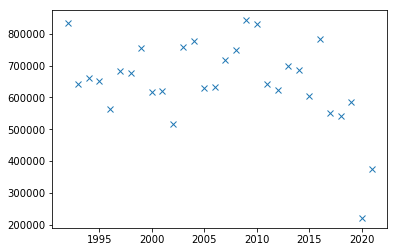

In [21]:
yearly_incidence.plot(style="x")

In [22]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

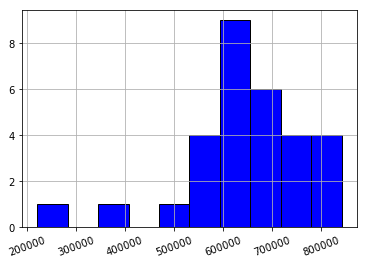

In [23]:
yearly_incidence.hist(xrot=20, color="b", edgecolor="k")